Chapter 11

# 椭圆视角看二元高斯分布
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

此代码通过可视化二维正态分布，探讨两个随机变量 $X$ 和 $Y$ 之间的条件期望和协方差结构。代码生成了 $X$ 和 $Y$ 的联合概率密度函数的等高线图，并绘制了主要的线性关系和协方差的边界。

### 1. 参数设置与二维正态分布的定义
设定变量 $X$ 和 $Y$ 的均值为 $(\mu_X, \mu_Y) = (0, 0)$，标准差分别为 $\sigma_X = 1$ 和 $\sigma_Y = 1.5$，相关系数 $\rho = 0.5$。其协方差矩阵为：
\[
\Sigma = \begin{bmatrix} \sigma_X^2 & \sigma_X \sigma_Y \rho \\ \sigma_X \sigma_Y \rho & \sigma_Y^2 \end{bmatrix} = \begin{bmatrix} 1 & 0.75 \\ 0.75 & 2.25 \end{bmatrix}
\]
联合分布定义为 $f_{X,Y}(x,y) \sim N(\mu, \Sigma)$，并计算了等高线图所需的联合概率密度函数 $f_{X,Y}(x,y)$。

### 2. 条件期望计算
分别计算 $Y$ 给定 $X$ 和 $X$ 给定 $Y$ 的条件期望：
\[
E(Y|X) = \mu_Y + \rho \frac{\sigma_Y}{\sigma_X} (X - \mu_X), \quad E(X|Y) = \mu_X + \rho \frac{\sigma_X}{\sigma_Y} (Y - \mu_Y)
\]
并将这两条条件期望线绘制在等高线图上，显示出 $X$ 和 $Y$ 的条件期望线性关系。

### 3. 协方差结构的主轴和次轴
利用 $\theta = \frac{1}{2} \arctan \left( \frac{2 \rho \sigma_X \sigma_Y}{\sigma_X^2 - \sigma_Y^2} \right)$，计算协方差的主轴和次轴，其斜率分别为：
\[
\text{主轴}: \; k = \tan(\theta), \quad \text{次轴}: \; -\frac{1}{k}
\]
主轴和次轴沿协方差椭圆方向延展，反映出 $X$ 和 $Y$ 的协方差结构。

### 4. 绘制协方差矩形框
协方差矩形框的边界定义为 $(\mu_X \pm \sigma_X, \mu_Y \pm \sigma_Y)$，显示 $X$ 和 $Y$ 各自的方差范围。

最终的等高线图完整展示了 $X$ 和 $Y$ 的联合概率分布，并结合条件期望线和主次轴的方向，揭示出二维正态分布的结构。

条件期望：
$$E[Y | X] = \mu_Y + \rho \frac{\sigma_Y}{\sigma_X} (X - \mu_X)$$

条件期望:
$$E[X | Y] = \mu_X + \rho \frac{\sigma_X}{\sigma_Y} (Y - \mu_Y)$$

主轴和次轴的角度公式  
角度：
$$\theta = \frac{1}{2} \arctan \left( \frac{2 \rho \sigma_X \sigma_Y}{\sigma_X^2 - \sigma_Y^2} \right)$$
斜率：
$$k = \tan(\theta)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm  # 导入颜色映射
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import multivariate_normal
from scipy.stats import norm
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import Rectangle

## 设置参数

In [2]:
rho     = 0.5  # 设置相关系数
sigma_X = 1    # 设置 X 的标准差
sigma_Y = 1.5  # 设置 Y 的标准差

mu_X = 0  # 设置 X 的均值
mu_Y = 0  # 设置 Y 的均值

width = 3  # 设置绘图范围

mu    = [mu_X, mu_Y]  # 定义均值向量
Sigma = [[sigma_X**2, sigma_X*sigma_Y*rho],  # 定义协方差矩阵
        [sigma_X*sigma_Y*rho, sigma_Y**2]]

In [3]:
X = np.linspace(-width,width,101)  # 创建 X 的线性空间
Y = np.linspace(-width,width,101)  # 创建 Y 的线性空间

XX, YY = np.meshgrid(X, Y)  # 创建网格数据

XXYY = np.dstack((XX, YY))  # 组合 X 和 Y 的网格
bi_norm = multivariate_normal(mu, Sigma)  # 创建二维正态分布对象

f_X_Y_joint = bi_norm.pdf(XXYY)  # 计算联合分布的概率密度

## 计算条件期望

In [4]:
E_Y_given_X = mu_Y + rho*sigma_Y/sigma_X*(X - mu_X)  # 计算 Y 在给定 X 下的条件期望

E_X_given_Y = mu_X + rho*sigma_X/sigma_Y*(Y - mu_Y)  # 计算 X 在给定 Y 下的条件期望

theta = 1/2*np.arctan(2*rho*sigma_X*sigma_Y/(sigma_X**2 - sigma_Y**2))  # 计算角度
k = np.tan(theta)  # 计算斜率

axis_minor = mu_Y + k*(X - mu_X)  # 计算次轴
axis_major = mu_Y - 1/k*(X - mu_X)  # 计算主轴

## 绘制联合分布图

(-3.0, 3.0)

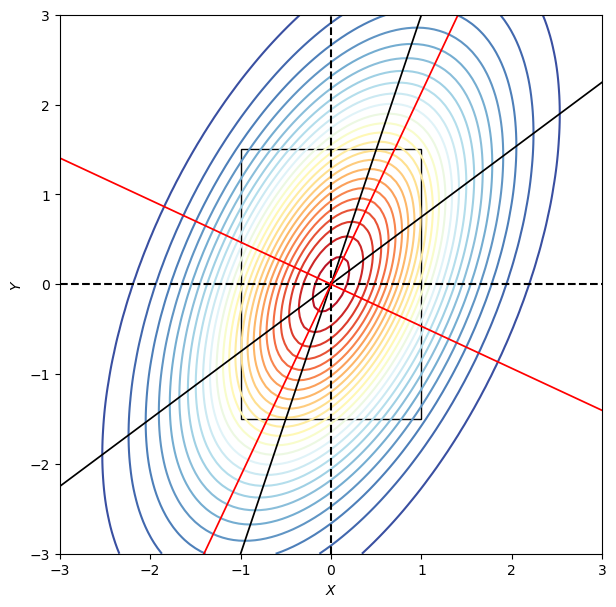

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))  # 创建图形和坐标轴

plt.contour(XX, YY, f_X_Y_joint, 25, cmap=cm.RdYlBu_r)  # 绘制联合分布等高线图
plt.axvline(x = mu_X, color = 'k', linestyle = '--')  # 绘制 X 轴参考线
plt.axhline(y = mu_Y, color = 'k', linestyle = '--')  # 绘制 Y 轴参考线

plt.plot(E_X_given_Y,Y, color = 'k', linewidth = 1.25)  # 绘制 X 给定 Y 的条件期望
plt.plot(X,E_Y_given_X, color = 'k', linewidth = 1.25)  # 绘制 Y 给定 X 的条件期望

## 绘制椭圆的主轴和次轴

plt.plot(X,axis_minor, color = 'r', linewidth = 1.25)  # 绘制次轴
plt.plot(X,axis_major, color = 'r', linewidth = 1.25)  # 绘制主轴

rect = Rectangle(xy = [mu_X - sigma_X, mu_Y - sigma_Y] , 
                 width = 2*sigma_X, 
                 height = 2*sigma_Y,
                 edgecolor = 'k',facecolor="none")  # 创建矩形边界框

ax.add_patch(rect)  # 添加矩形到图形上

ax.set_xlabel('$X$')  # 设置 X 轴标签
ax.set_ylabel('$Y$')  # 设置 Y 轴标签
ax.set_xlim(-width,width)  # 设置 X 轴范围
ax.set_ylim(-width,width)  # 设置 Y 轴范围